In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
engine

Engine(sqlite:///hawaii.sqlite)

In [6]:
#to see the table names in the db
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

 Exploratory Climate Analysis

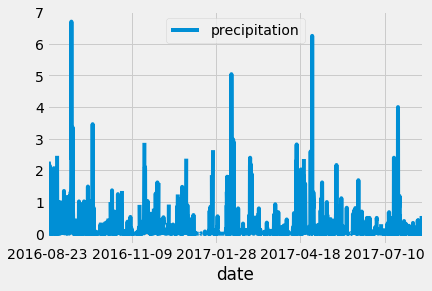

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last12_mo = dt.date(2017,8,23) - dt.timedelta(days=365)

# Calculate the date 1 year ago from the last data point in the database
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last12_mo).all()

# Perform a query to retrieve the data and precipitation scores
climate_df = pd.DataFrame(results, columns=["date","precipitation"])


# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df.set_index(climate_df["date"], inplace=True)

# Sort the dataframe by date
climate_df = climate_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
climate_df.plot()


In [12]:
climate_df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [14]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

In [15]:
climate_df.dtypes

date              object
precipitation    float64
dtype: object

In [16]:
climate_df.head()


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


In [32]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
# Which station has the highest number of observations? WAIHEE HAS THE HIGHEST NUMBER OF OBSERVATIONS

most_actv_station = session.query(Measurement.station, func.count(Measurement.tobs))\
                    .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

most_actv_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Choose the station with the highest number of temperature observations.
# Using the Measurement id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active Measurement

temps = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

session.query(*temps).filter(Measurement.station == 'USC00519281').all()
     

[(54.0, 85.0, 71.66378066378067)]

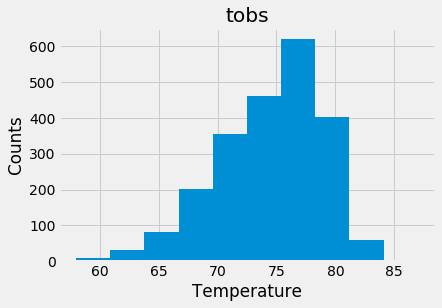

In [56]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last12_mo_temp = dt.date(2017,8,23) - dt.timedelta(365)
# last12_mo_temp
temperatures = session.query(Measurement.tobs).filter(Measurement.date>= last12_mo_temp).all()

temps=pd.DataFrame(temperatures)

temps.hist()
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.show()

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [58]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

calc_temps('2017-06-1','2017-06-15')

[(72.0, 76.87179487179488, 83.0)]

In [65]:
my_trip=calc_temps('2017-06-1','2017-06-15')

pd.DataFrame({"minT":[my_trip[0][0]],"avgT":[my_trip[0][1]],"maxT":[my_trip[0][2]]})

,minT,avgT,maxT
0,72.0,76.871795,83.0


In [ ]:
# Plot the results from your previous query as a bar chart. 


fig,ax=plt.subplots(figsize=plt.figaspecs(2.))
xpos=1
yerr=my_trip["temp_max"]


# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [ ]:
# output: <IPython.core.display.Javascript object>

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
#output: [('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]